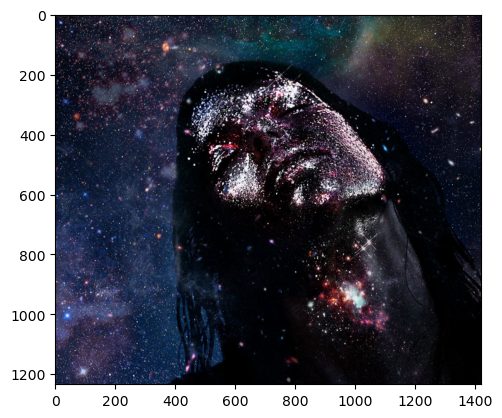

In [153]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_name = 'sc'
img = cv.cvtColor(cv.imread(img_name + '.png'), cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
rows, cols, channels = img.shape
plt.imshow(img)

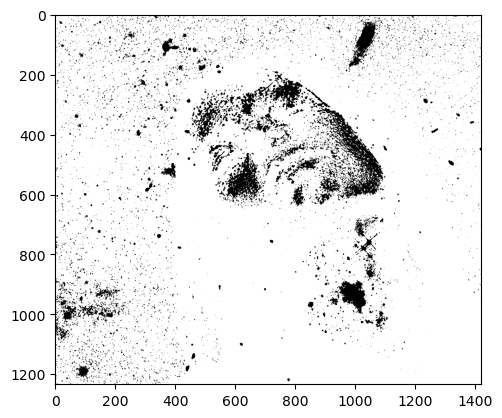

In [154]:
thresh = np.max(img_gray)/3
mask = img_gray < thresh
plt.imshow(img_gray < thresh, cmap='gray')

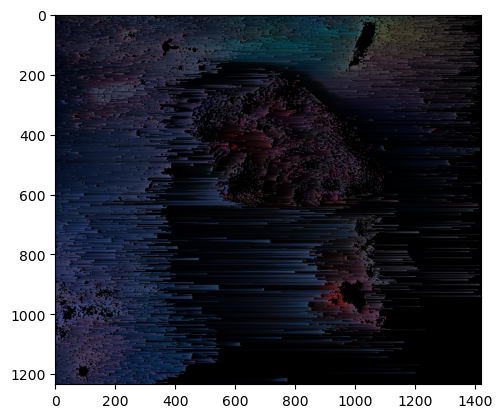

In [155]:
sorted_img = np.zeros_like(img)

for i in range(rows):
    row_rgb = img[i, :, :]
    row_gray = img_gray[i]
    mask_row = mask[i]
    spans = []
    span_active = False
    span = [0, 0]
    for j in range(cols):
        if j == cols:
            if span_active:
                span[1] = j
                spans.append(span)
        if not span_active and mask_row[j] == True:
            span_active = True
            span[0] = j
            continue
        if span_active and mask_row[j] == False:
            span[1] = j-1
            spans.append(span)
            span = [0, 0]
            span_active = False


    for [start, end] in spans:
        span_rgb = row_rgb[start:end]
        span_metric = row_gray[start:end]
        sort_inds = span_metric.argsort()
        span_rgb_sorted = span_rgb[sort_inds]
        sorted_img[i][start:end] = span_rgb_sorted
plt.imshow(sorted_img)